In [305]:
# tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

# Pair Programming EDA
### Ana Gonzalez y Ana Campos

Para los ejercicios de pair programming de Regresión logística temdremos que buscar un dataset (al igual que hicismos en regresión lineal) que usaremosmos a lo largo de los siguientes ejercicios.
Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.
## Objetivos
Buscar un **conjunto** de datos a analizar
Se recomienda que el conjunto de datos a analizar tenga variables **numéricas** y categóricas, primando que haya más de una variable de tipo numérico.
- Explicar los **datos** y las **variables disponibles** en el conjunto de datos seleccionado
- Realizar un **EDA** sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.
- Interpretación de los **resultados**.

**Data Description**

Demographic:

- Sex: male or female("M" or "F")
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral

- is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

- BP Meds: whether or not the patient was on blood pressure medication (Nominal) Si el paciente estaba tomando medicamentos para la presión arterial
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) Si han tenido previamente un derrame cerebral
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal) Si tienen o no  hipertensión
- Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)

- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

Predict variable (desired target)

- 10 year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)


In [306]:
df_test = pd.read_csv("../data-log/00-test.csv", index_col = 0).reset_index()
df_test.head(2)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0


In [307]:
df = pd.read_csv("../data-log/00-train.csv", index_col = 0).reset_index()
df.head(2)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0


Tenemos dos datasets, al cargarlos, vemos que en el test no está la que al ver lo dataset consideramos que es la variable respuesta, que es la probabilidad de tener cancer en 10 años, por lo que nos quedaremos trabanjando con el dataset que contiene esta. 

## Entender las variables que tenemos y como es nuestro dataframe. 

In [308]:
# número de filas y columnas del dataframe
df.shape

(3390, 17)

In [309]:
# información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [310]:
# nombre de las columnas de nuestro dataframe
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [311]:
# principales estadísticos de las columnas numéricas. recordemos que por defecto el describe nos devuelve las numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


In [312]:
# principales estadisticos de las variables categóricas
df.describe(include ="object").T

,count,unique,top,freq
sex,3390,2,F,1923
is_smoking,3390,2,NO,1703


---

## Nulos

In [313]:
# valores nulos en el dataframe
pd.DataFrame(df.isnull().sum())


,0
id,0
age,0
education,87
sex,0
is_smoking,0
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0


In [314]:
nulos = pd.DataFrame((df.isnull().sum() * 100) / df.shape[0]).reset_index()
nulos.columns = ["columna", "porcentaje"]
nulos.sort_values('porcentaje', ascending=False)# ordena el porcentaje de mayor a menor

,columna,porcentaje
15,glucose,8.967552
2,education,2.566372
6,BPMeds,1.297935
10,totChol,1.120944
5,cigsPerDay,0.648968
13,BMI,0.412979
14,heartRate,0.029499
0,id,0.000000
12,diaBP,0.000000
11,sysBP,0.000000


In [315]:
df.stb.missing()

,missing,total,percent
glucose,304,3390,8.967552
education,87,3390,2.566372
BPMeds,44,3390,1.297935
totChol,38,3390,1.120944
cigsPerDay,22,3390,0.648968
BMI,14,3390,0.412979
heartRate,1,3390,0.029499
id,0,3390,0.000000
diaBP,0,3390,0.000000
sysBP,0,3390,0.000000


# Tratamiento de nulos

### Cigarrillos por dia y fumadores

In [316]:
nulos_cig= df.get(df['cigsPerDay'].isnull())# Buscamos los nulos de la columna en cigarrillos por dia 
nulos_cig.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,422,55,1.0,F,YES,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,466,45,3.0,M,YES,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,469,42,1.0,M,YES,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,491,61,1.0,F,YES,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,538,41,1.0,F,YES,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0


In [317]:
nulos_cig.is_smoking.value_counts()

YES    22
Name: is_smoking, dtype: int64

    Miramos dentro de las personas que no tienen los cigarrillos por dia, si son fumadores, como son todos fumadores, tenemos que pensar como imputar los nulos

In [318]:
#df_fuma = nulos_cig[(nulos_cig['is_smoking'] == 'YES')]# seleccionamos las personas fumadoras de entre los nulos
#df_fuma.head()

In [319]:
df_f=df[df['is_smoking'] == 'YES']# Creamos un df solo con los fumadores para poder ver sus datos
df_f.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0


In [320]:
pd.DataFrame(df_f['cigsPerDay'].describe().T)# vemos sus datos

,cigsPerDay
count,1665.000000
mean,18.345946
std,10.735196
min,1.000000
25%,10.000000
50%,20.000000
75%,20.000000
max,70.000000


        Hemos mirado si fuman o no fuman los nulos correspondientes a cigarrillos al dia, 

        para saber como imputar el valor, como todos fuman, valoramos media y mediana,

        como son numeros similares, seleccionamos el valor entero que es la mediana.

In [321]:
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)

In [322]:
df.cigsPerDay.isnull().sum()

0

### Glucosa y diabetes

In [323]:
df.stb.missing()

,missing,total,percent
glucose,304,3390,8.967552
education,87,3390,2.566372
BPMeds,44,3390,1.297935
totChol,38,3390,1.120944
BMI,14,3390,0.412979
heartRate,1,3390,0.029499
id,0,3390,0.000000
diaBP,0,3390,0.000000
sysBP,0,3390,0.000000
prevalentHyp,0,3390,0.000000


In [324]:
nulos_gluco= df.get(df['glucose'].isnull())# Buscamos los nulos en glucosa para seleccionar la población y saber si son diabeticos o no.
nulos_gluco.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0
10,10,61,1.0,F,NO,0.0,0.0,0,1,0,NaN,185.0,121.0,35.22,80.0,NaN,0
36,36,46,3.0,F,NO,0.0,0.0,0,0,0,193.0,106.5,70.5,26.18,75.0,NaN,0
38,38,41,2.0,F,YES,9.0,1.0,1,1,0,180.0,114.0,70.0,22.41,92.0,NaN,0
55,55,51,2.0,F,NO,0.0,0.0,0,1,0,351.0,134.0,97.5,21.66,100.0,NaN,0


In [325]:
nulos_gluco.diabetes.value_counts()# ¿Cuantas personas tienen diabetes, dentro de los nulos?

0    301
1      3
Name: diabetes, dtype: int64

In [326]:
df_diabetes = df[(df['diabetes'] == 1)]# Seleccionamos la población de diabeticos
df_diabetes.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
77,77,63,1.0,F,NO,0.0,0.0,0,1,1,150.0,152.0,88.0,36.54,72.0,170.0,0
107,107,45,4.0,M,NO,0.0,0.0,0,0,1,189.0,132.0,78.0,28.40,75.0,177.0,0
130,130,63,1.0,M,NO,0.0,0.0,0,0,1,229.0,109.0,75.0,38.42,110.0,120.0,0
134,134,64,1.0,F,NO,0.0,0.0,0,1,1,262.0,147.0,90.0,26.51,85.0,173.0,0
173,173,58,1.0,F,NO,0.0,0.0,1,1,1,267.0,157.0,94.0,33.32,92.0,205.0,1


In [327]:
pd.DataFrame(df_diabetes['glucose'].describe().T)

,glucose
count,84.000000
mean,171.964286
std,85.267891
min,47.000000
25%,111.500000
50%,150.000000
75%,217.750000
max,394.000000


    Vemos que son solo son 3 personas que son diabeticas y que tienen valores nulos en la casilla de glucose,decidimos imputar el valor de la media en los diabeticos, porque no se nos va modificar mucho la estadistica ya que son solo tres valores.

    Con los no diabeticos con la mediana( es mas robusta, y los niveles de glucosa en sangre en personas sanas, estan en unos rangos estrechos) porque los vamos a tratar como dos poblaciones diferentes.

---

In [328]:
df_diabetes_no = df[(df['diabetes'] == 0)]
df_diabetes_no.head(20)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [329]:
df_diabetes.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
77,77,63,1.0,F,NO,0.0,0.0,0,1,1,150.0,152.0,88.0,36.54,72.0,170.0,0
107,107,45,4.0,M,NO,0.0,0.0,0,0,1,189.0,132.0,78.0,28.40,75.0,177.0,0
130,130,63,1.0,M,NO,0.0,0.0,0,0,1,229.0,109.0,75.0,38.42,110.0,120.0,0
134,134,64,1.0,F,NO,0.0,0.0,0,1,1,262.0,147.0,90.0,26.51,85.0,173.0,0
173,173,58,1.0,F,NO,0.0,0.0,1,1,1,267.0,157.0,94.0,33.32,92.0,205.0,1


In [330]:
df_diabetes['glucose'].fillna(df_diabetes['glucose'].mean(), inplace=True)

In [331]:
df_diabetes.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
77,77,63,1.0,F,NO,0.0,0.0,0,1,1,150.0,152.0,88.0,36.54,72.0,170.0,0
107,107,45,4.0,M,NO,0.0,0.0,0,0,1,189.0,132.0,78.0,28.40,75.0,177.0,0
130,130,63,1.0,M,NO,0.0,0.0,0,0,1,229.0,109.0,75.0,38.42,110.0,120.0,0
134,134,64,1.0,F,NO,0.0,0.0,0,1,1,262.0,147.0,90.0,26.51,85.0,173.0,0
173,173,58,1.0,F,NO,0.0,0.0,1,1,1,267.0,157.0,94.0,33.32,92.0,205.0,1


In [332]:
df_diabetes_no['glucose'].fillna(df_diabetes_no['glucose'].median(), inplace=True)
df_diabetes_no.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [333]:
df_concat = pd.concat([df_diabetes_no, df_diabetes], axis = 0)
df_concat.head(20)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,78.0,0


In [334]:
df_concat.shape

(3390, 17)

In [335]:
df_concat.stb.missing()

,missing,total,percent
education,87,3390,2.566372
BPMeds,44,3390,1.297935
totChol,38,3390,1.120944
BMI,14,3390,0.412979
heartRate,1,3390,0.029499
id,0,3390,0.000000
glucose,0,3390,0.000000
diaBP,0,3390,0.000000
sysBP,0,3390,0.000000
prevalentHyp,0,3390,0.000000


# BPMeds

Para el tratamiento de estos nulos vamso a comprobar si estas persona son o no hipertensos.

In [336]:
nulos_bpme= df_concat.get(df_concat['BPMeds'].isnull())# Buscamos los nulos en bpmeds para seleccionar la población y saber si son hipertensos o no.
nulos_bpme.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
102,102,68,2.0,F,NO,0.0,NaN,0,0,0,257.0,144.0,95.0,29.25,80.0,77.0,0
128,128,67,2.0,F,NO,0.0,NaN,0,0,0,261.0,117.0,63.0,22.55,75.0,83.0,0
174,174,60,1.0,F,NO,0.0,NaN,0,1,0,273.0,176.0,84.0,22.17,66.0,79.0,0
194,194,56,1.0,F,NO,0.0,NaN,0,1,0,391.0,126.0,84.0,24.83,80.0,78.0,0


In [337]:
nulos_bpme['prevalentHyp'].value_counts()

0    25
1    19
Name: prevalentHyp, dtype: int64

In [338]:
df_hiper_no = df_concat[(df_concat['prevalentHyp']== 0)]

In [339]:
df_hiper_si = df_concat[(df_concat['prevalentHyp']== 1)]

Los vamos a sustituir por la mediana distinguiendo entre  grupos de hipertensos y no hipertensos, lo que creemos correcto seria estudiar las presiones sistolicas y asistolicas de los nulos para la medicacion, y aproximar mas con esos grupos si es habitual que la tomen o no. Pero el tiempo es limitado.

In [340]:
df_hiper_no['BPMeds'].fillna(df_hiper_no['BPMeds'].median(), inplace=True)
df_hiper_no.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,0.0,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0


In [341]:
df_hiper_si['BPMeds'].fillna(df_hiper_si['BPMeds'].median(), inplace=True)
df_hiper_si.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,78.0,0


In [342]:
df_concat2 = pd.concat([df_hiper_no, df_hiper_si], axis = 0)
df_concat2.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,0.0,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0


In [343]:
df_concat2.stb.missing()

,missing,total,percent
education,87,3390,2.566372
totChol,38,3390,1.120944
BMI,14,3390,0.412979
heartRate,1,3390,0.029499
id,0,3390,0.000000
diabetes,0,3390,0.000000
glucose,0,3390,0.000000
diaBP,0,3390,0.000000
sysBP,0,3390,0.000000
prevalentHyp,0,3390,0.000000


# BMI, totChol(colesterol) y heartRate 

In [344]:
df_numericas=df_concat2.select_dtypes(np.number)

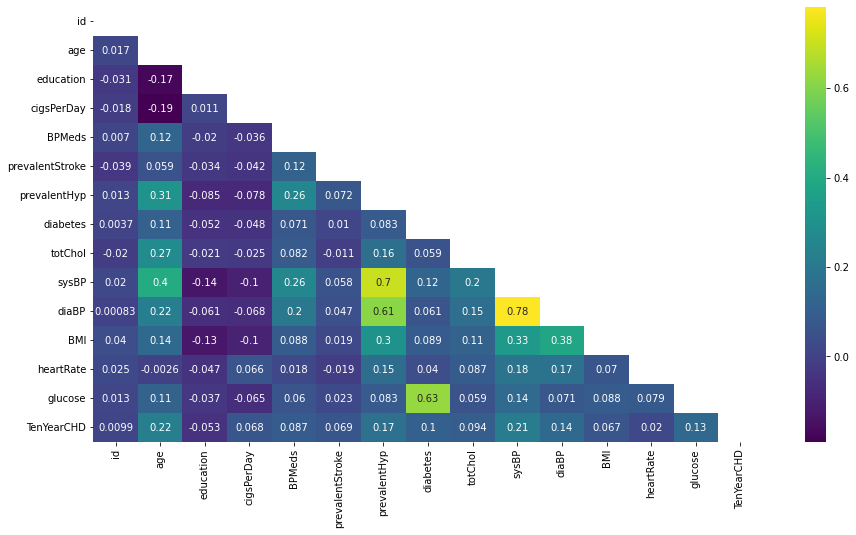

In [345]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(df_numericas.corr(), dtype=bool))
sns.heatmap(df_numericas.corr(), cmap="viridis", annot = True, mask = mask); #barra lateral

 Apoyandonos en el heatmap, vemos que no hay correlación con ninguna de las otras variables, para ninguna de las enunciadas arriba, y de las categóricas, nos quedaria fuera el sexo, porque si son fumadores o no, lo tenemos de otra manera con cigarrillos, por otro lado, al estar categorizadas, algunas de las numéricas(que eran categóricas, como educacion), nos hacen dificil establecer si existe relación real. Como son pocos nulos, hemos acordado sustituirlos por las medias en cada caso. Vamos a realizar imputacion ascendente de nulos, con IterativeImputer, esperando sea más real que tomando sólo de referencia el valor bruto de la columna, tomando la mediana de la parte poblacional más relacionada.

In [346]:
df_numericas.drop('education', axis=1, inplace=True)

In [347]:
# creamos una instancia del método Iterative Imputer con las características que queremos, para estis valores, la media, en educación, que está categorizada, usaremos otra estrategia 
imputer = IterativeImputer(n_nearest_features=None, imputation_order='ascending')

In [348]:
# lo aplicamos sobre nuestras variables numéricas. 

imputer.fit(df_numericas)


IterativeImputer()

In [349]:
# transformamos nuestros datos, para que se reemplacen los valores nulos usando "transform". 
imputer.transform(df_numericas)

array([[0.000e+00, 6.400e+01, 3.000e+00, ..., 9.000e+01, 8.000e+01,
        1.000e+00],
       [2.000e+00, 4.600e+01, 1.000e+01, ..., 8.800e+01, 9.400e+01,
        0.000e+00],
       [4.000e+00, 6.400e+01, 3.000e+01, ..., 7.000e+01, 7.700e+01,
        0.000e+00],
       ...,
       [3.212e+03, 6.000e+01, 0.000e+00, ..., 7.100e+01, 7.800e+01,
        0.000e+00],
       [3.232e+03, 5.000e+01, 0.000e+00, ..., 8.500e+01, 2.600e+02,
        0.000e+00],
       [3.260e+03, 4.300e+01, 0.000e+00, ..., 6.800e+01, 2.740e+02,
        1.000e+00]])

In [350]:
# convertimos el array que nos devuelve en un dataframe y comprobamos si hay nulos

numericas_trans = pd.DataFrame(imputer.transform(df_numericas), columns = df_numericas.columns)
numericas_trans.isnull().sum()

id                 0
age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [351]:
numericas_trans.reset_index(inplace=True)

In [352]:
# lo primero que hacemos es sacar el nombre de las columnas del dataframe sin nulos

columnas = numericas_trans.columns

In [353]:
df_concat2.reset_index(inplace=True)
df_concat2.head(2)

,index,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0


In [354]:
# utilizando "columnas" eliminamos esas columnas de nuestro dataframe

df_concat2.drop(columnas, axis = 1, inplace = True)

In [355]:
# creamos nuevas columnas en nuestro dataframe original basándonos en el dataframe de las numericas_trans

df_concat2[columnas] = numericas_trans[columnas]

In [356]:
df_concat2.isnull().sum()

education          87
sex                 0
is_smoking          0
index               0
id                  0
age                 0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [357]:
df_concat2.shape

(3390, 18)

# Educacion
#### Elegimos estrategia most frecuent para el IterativeImputer

In [358]:
df_numericas2=df_concat2.select_dtypes(np.number)

In [359]:
df_numericas2['education'].astype('category')

0       2.0
1       1.0
2       1.0
3       4.0
4       2.0
       ... 
3385    4.0
3386    1.0
3387    1.0
3388    1.0
3389    1.0
Name: education, Length: 3390, dtype: category
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]

In [360]:
df_numericas2['education'].isnull().sum()

87

In [361]:
# creamos una instancia del método Iterative Imputer con las características que queremos 
imputer2 = IterativeImputer(n_nearest_features=None,initial_strategy='most_frequent', imputation_order='ascending')

In [362]:
# lo aplicamos sobre nuestras variables numéricas. 

imputer2.fit(df_numericas2)


IterativeImputer(initial_strategy='most_frequent')

In [363]:
# transformamos nuestros datos, para que se reemplacen los valores nulos usando "transform". 
## ⚠️ Esto nos va a devolver un array!

imputer2.transform(df_numericas2)

array([[2.000e+00, 0.000e+00, 0.000e+00, ..., 9.000e+01, 8.000e+01,
        1.000e+00],
       [1.000e+00, 1.000e+00, 2.000e+00, ..., 8.800e+01, 9.400e+01,
        0.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, ..., 7.000e+01, 7.700e+01,
        0.000e+00],
       ...,
       [1.000e+00, 3.387e+03, 3.212e+03, ..., 7.100e+01, 7.800e+01,
        0.000e+00],
       [1.000e+00, 3.388e+03, 3.232e+03, ..., 8.500e+01, 2.600e+02,
        0.000e+00],
       [1.000e+00, 3.389e+03, 3.260e+03, ..., 6.800e+01, 2.740e+02,
        1.000e+00]])

In [364]:
# convertimos el array que nos devuelve en un dataframe

numericas_trans2 = pd.DataFrame(imputer2.transform(df_numericas2), columns = df_numericas2.columns)

In [365]:
# perfecto, ya no tenemos ningún nulo! 

numericas_trans2.reset_index(inplace=True)
numericas_trans2.head()

,level_0,education,index,id,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,2.0,0.0,0.0,64.0,3.0,0.0,0.0,0.0,0.0,221.0,148.0,85.0,26.060925,90.0,80.0,1.0
1,1,1.0,1.0,2.0,46.0,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.350000,88.0,94.0,0.0
2,2,1.0,2.0,4.0,64.0,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.420000,70.0,77.0,0.0
3,3,4.0,3.0,7.0,36.0,35.0,0.0,0.0,0.0,0.0,295.0,102.0,68.0,28.150000,60.0,63.0,0.0
4,4,2.0,4.0,8.0,41.0,20.0,0.0,0.0,0.0,0.0,220.0,126.0,78.0,20.700000,86.0,79.0,0.0


In [366]:
df_concat2.head()

,education,sex,is_smoking,index,id,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,2.0,F,YES,0,0.0,64.0,3.0,0.0,0.0,0.0,0.0,221.0,148.0,85.0,26.060925,90.0,80.0,1.0
1,1.0,F,YES,1,2.0,46.0,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.350000,88.0,94.0,0.0
2,1.0,F,YES,2,4.0,64.0,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.420000,70.0,77.0,0.0
3,4.0,M,YES,3,7.0,36.0,35.0,0.0,0.0,0.0,0.0,295.0,102.0,68.0,28.150000,60.0,63.0,0.0
4,2.0,F,YES,4,8.0,41.0,20.0,0.0,0.0,0.0,0.0,220.0,126.0,78.0,20.700000,86.0,79.0,0.0


In [367]:
# lo primero que hacemos es sacar el nombre de las columnas del dataframe sin nulos

columnas2 = numericas_trans2.columns

In [368]:
df_concat2.reset_index(inplace=True)

In [369]:
# utilizando "columnas" eliminamos esas columnas de nuestro dataframe

df_concat2.drop(columnas2, axis = 1, inplace = True)

In [370]:
# creamos nuevas columnas en nuestro dataframe original basándonos en el dataframe de las numericas_trans

df_concat2[columnas2] = numericas_trans2[columnas2]

In [371]:
df_concat2.isnull().sum()

sex                0
is_smoking         0
level_0            0
education          0
index              0
id                 0
age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [372]:
df_concat2.drop('level_0', axis = 1, inplace = True)

In [373]:
df_concat2.shape

(3390, 18)

In [374]:
df_concat2['education']=np.round(df_concat2['education'], decimals=0)

Tenemos decimales, asi que redondeamos para seguir manteniendo la categorización correcta

In [375]:
df_concat2['education'].value_counts()

1.0    1392
2.0    1075
3.0     550
4.0     373
Name: education, dtype: int64

---

## Duplicados

In [376]:
# duplicados 
df_concat2.duplicated().sum()

0

In [377]:
df_concat2.id.duplicated().sum()

0

---

# Outliers

In [378]:
df_concat2.describe().T

,count,mean,std,min,25%,50%,75%,max
education,3390.0,1.971681,1.006219,1.00,1.00,2.00,3.000,4.0
index,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.750,3389.0
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.750,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.000,70.0
cigsPerDay,3390.0,9.010619,11.862839,0.00,0.00,0.00,20.000,70.0
BPMeds,3390.0,0.029499,0.169224,0.00,0.00,0.00,0.000,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.000,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.000,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.000,1.0
totChol,3390.0,237.125988,45.016600,107.00,206.00,234.00,264.000,696.0


In [379]:
df_concat2.drop('index', axis=1,inplace=True)

In [380]:
numericas = df_concat2.select_dtypes(include=np.number)
numericas.head(2)

,education,id,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,2.0,0.0,64.0,3.0,0.0,0.0,0.0,0.0,221.0,148.0,85.0,26.060925,90.0,80.0,1.0
1,1.0,2.0,46.0,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.350000,88.0,94.0,0.0


In [381]:
numericas=numericas[['id','education',  'age', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD']]
numericas.head()

,id,education,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0.0,2.0,64.0,3.0,0.0,0.0,0.0,0.0,221.0,148.0,85.0,26.060925,90.0,80.0,1.0
1,2.0,1.0,46.0,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.350000,88.0,94.0,0.0
2,4.0,1.0,64.0,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.420000,70.0,77.0,0.0
3,7.0,4.0,36.0,35.0,0.0,0.0,0.0,0.0,295.0,102.0,68.0,28.150000,60.0,63.0,0.0
4,8.0,2.0,41.0,20.0,0.0,0.0,0.0,0.0,220.0,126.0,78.0,20.700000,86.0,79.0,0.0


In [384]:
numericas.set_index('id')

,education,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,
0.0,2.0,64.0,3.0,0.0,0.0,0.0,0.0,221.0,148.0,85.0,26.060925,90.0,80.0,1.0
2.0,1.0,46.0,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.350000,88.0,94.0,0.0
4.0,1.0,64.0,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.420000,70.0,77.0,0.0
7.0,4.0,36.0,35.0,0.0,0.0,0.0,0.0,295.0,102.0,68.0,28.150000,60.0,63.0,0.0
8.0,2.0,41.0,20.0,0.0,0.0,0.0,0.0,220.0,126.0,78.0,20.700000,86.0,79.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117.0,4.0,47.0,15.0,0.0,0.0,1.0,1.0,210.0,163.5,97.0,28.240000,105.0,183.0,0.0
3159.0,1.0,68.0,0.0,0.0,0.0,1.0,1.0,164.0,142.0,85.0,30.280000,70.0,120.0,1.0
3212.0,1.0,60.0,0.0,0.0,0.0,1.0,1.0,282.0,213.0,94.5,28.580000,71.0,78.0,0.0


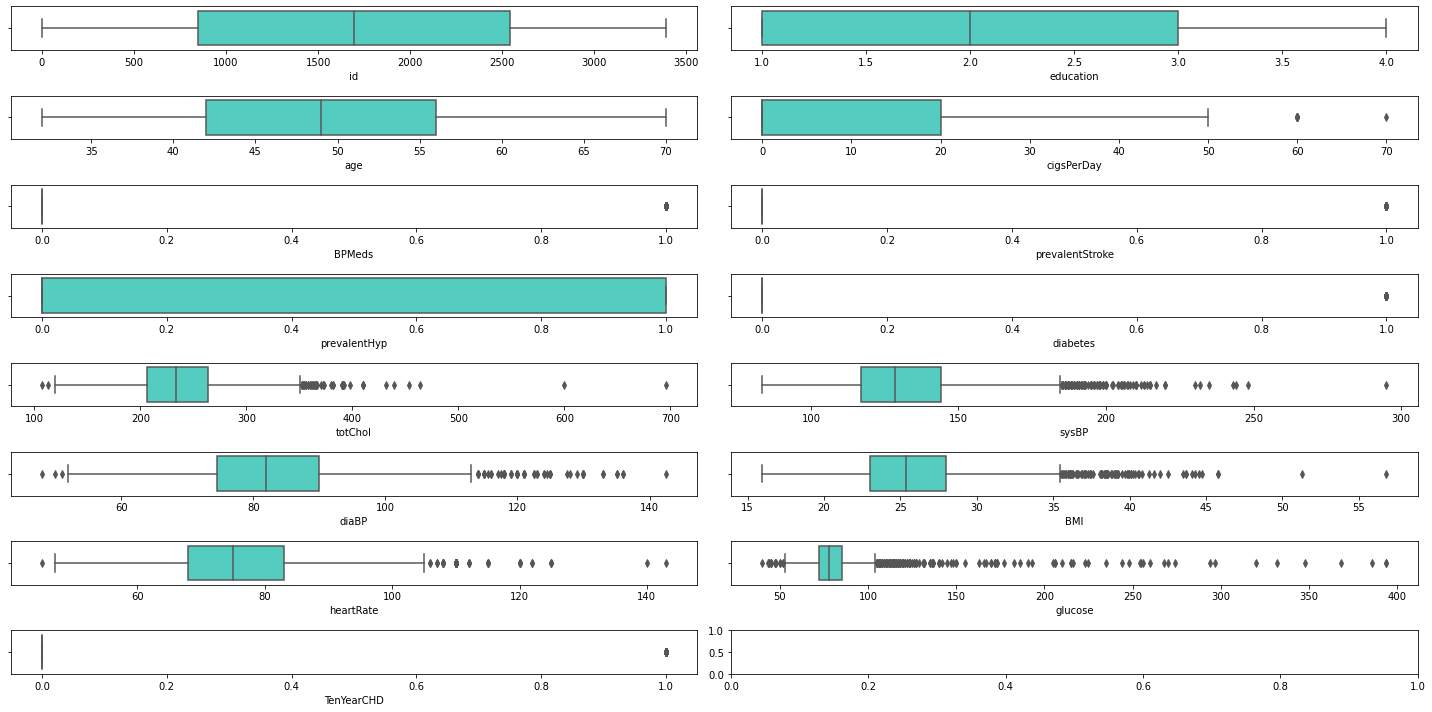

In [386]:
fig, axes = plt.subplots(8,2, figsize=(20,10))
axes = axes.flat
for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df_concat2, ax=axes[indice], color = "turquoise"); 
plt.tight_layout()
plt.show();

Detectar valores de los outliers

In [ ]:
def detectar_outliers(lista_columnas, dataframe): 
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        # calculamos los límites
        outlier_step = 1.5 * IQR
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
            dicc_indices[col] = (list(outliers_data.index)) 
    return dicc_indices 

In [ ]:
#lista_columnas = list(numericas.columns)
#ind = detectar_outliers(lista_columnas, df)

In [ ]:
# en que columnas nos hemos encontrado con outliers? 
#ind.keys()

In [ ]:
# Iteramos por el diccionario que hemos creado con los índices de los outliers
#for k, v in ind.items():
    # Sacamos la mediana de cada columna numérica
    #mediana = df[k].median()
    # iteramos por cada fila de la columna en la que hay outliers y convertimos ese valor en la mediana
    #for i in v:
        #df.loc[i,k] = mediana



In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3390.0,9.010619,11.862839,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


---

In [388]:
df_concat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3390 non-null   object 
 1   is_smoking       3390 non-null   object 
 2   education        3390 non-null   float64
 3   id               3390 non-null   float64
 4   age              3390 non-null   float64
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   float64
 8   prevalentHyp     3390 non-null   float64
 9   diabetes         3390 non-null   float64
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   float64
dtypes: float64(15)

In [391]:
#Damos la categoria adecuada a nuestros datos, aunque son numericos, están categorizados
columnas_categoria = ["education", "diabetes", "TenYearCHD", "prevalentHyp", "prevalentStroke", "BPMeds", "education","sex","is_smoking"]

for i in columnas_categoria:
    df_concat2[i] = df_concat2[i].astype("category")

In [392]:
df_concat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sex              3390 non-null   category
 1   is_smoking       3390 non-null   category
 2   education        3390 non-null   category
 3   id               3390 non-null   float64 
 4   age              3390 non-null   float64 
 5   cigsPerDay       3390 non-null   float64 
 6   BPMeds           3390 non-null   category
 7   prevalentStroke  3390 non-null   category
 8   prevalentHyp     3390 non-null   category
 9   diabetes         3390 non-null   category
 10  totChol          3390 non-null   float64 
 11  sysBP            3390 non-null   float64 
 12  diaBP            3390 non-null   float64 
 13  BMI              3390 non-null   float64 
 14  heartRate        3390 non-null   float64 
 15  glucose          3390 non-null   float64 
 16  TenYearCHD       3390 non-null   category


## Analizar las relaciones entre las variables. 

### Variable respuesta

In [ ]:
df_concat2.head(2)

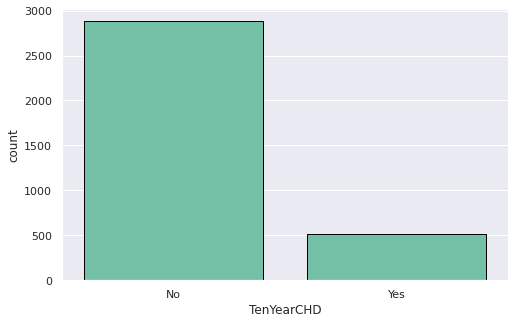

In [393]:
# vamos a ver visualmente como está distribuida la variable respuesta
plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df_concat2, x = "TenYearCHD",  color = "mediumaquamarine",  edgecolor='black')
fig1.set(xticklabels=["No", "Yes"]) 
plt.show();

Distribucion de la respuesta segun variables categóricas

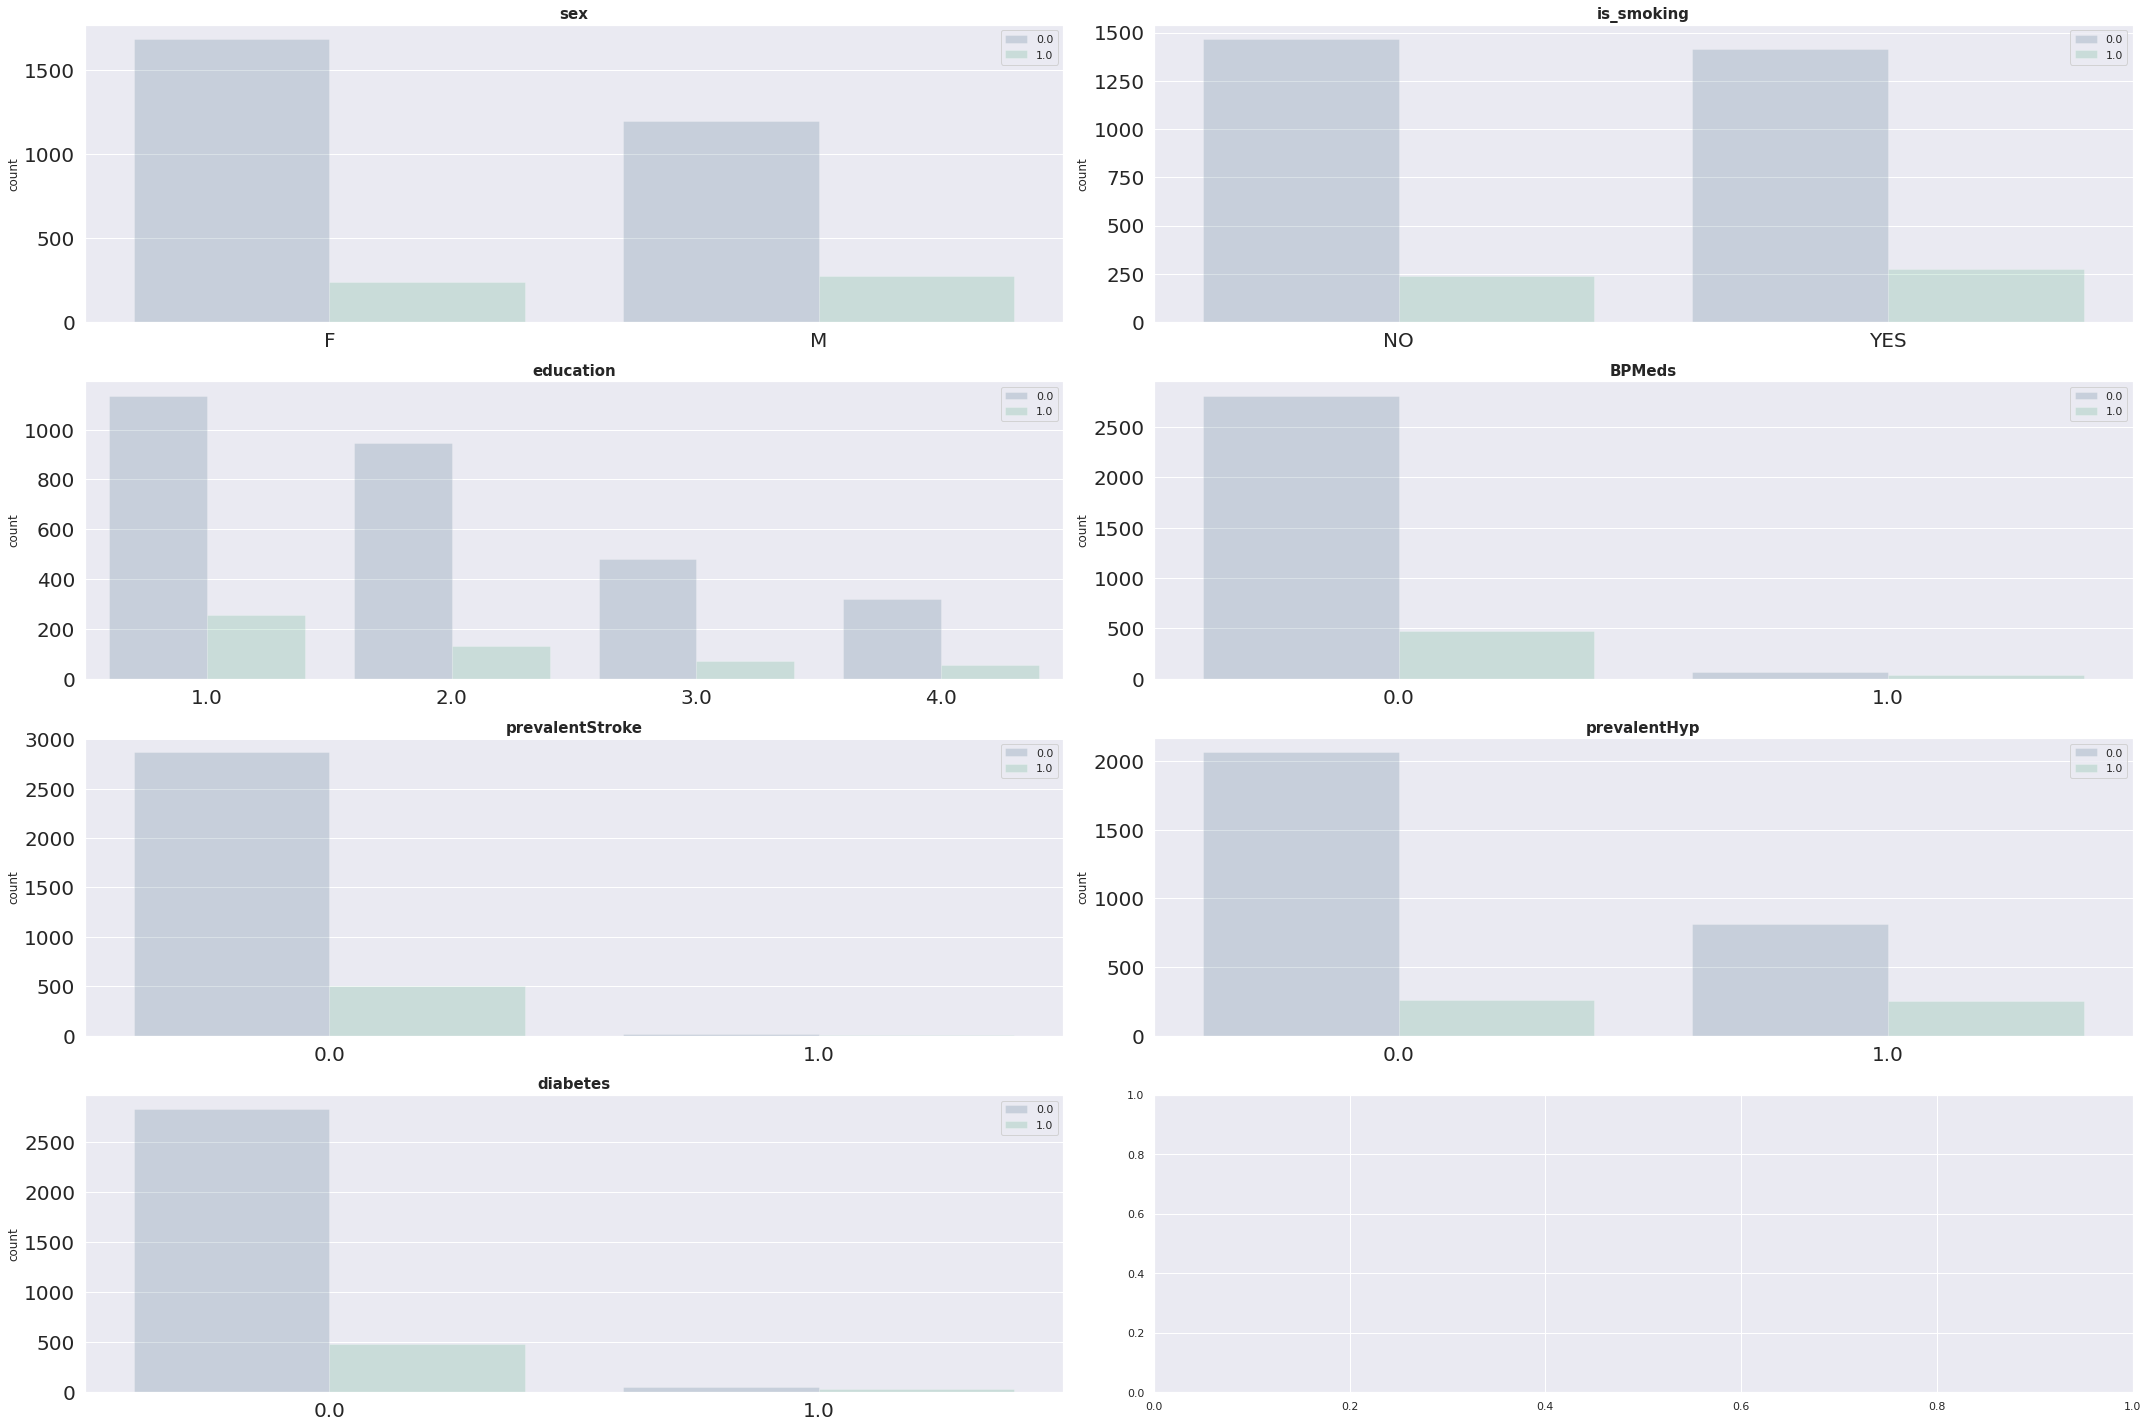

In [399]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (30, 20))

axes = axes.flat
columnas_cat = df_concat2.select_dtypes(include = "category").columns
columnas_cat = columnas_cat.drop("TenYearCHD")
for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df_concat2,
        x = colum,
        hue = "TenYearCHD",
        palette = 'viridis',
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")

fig.tight_layout()

#### Variables numéricas, distribucion.

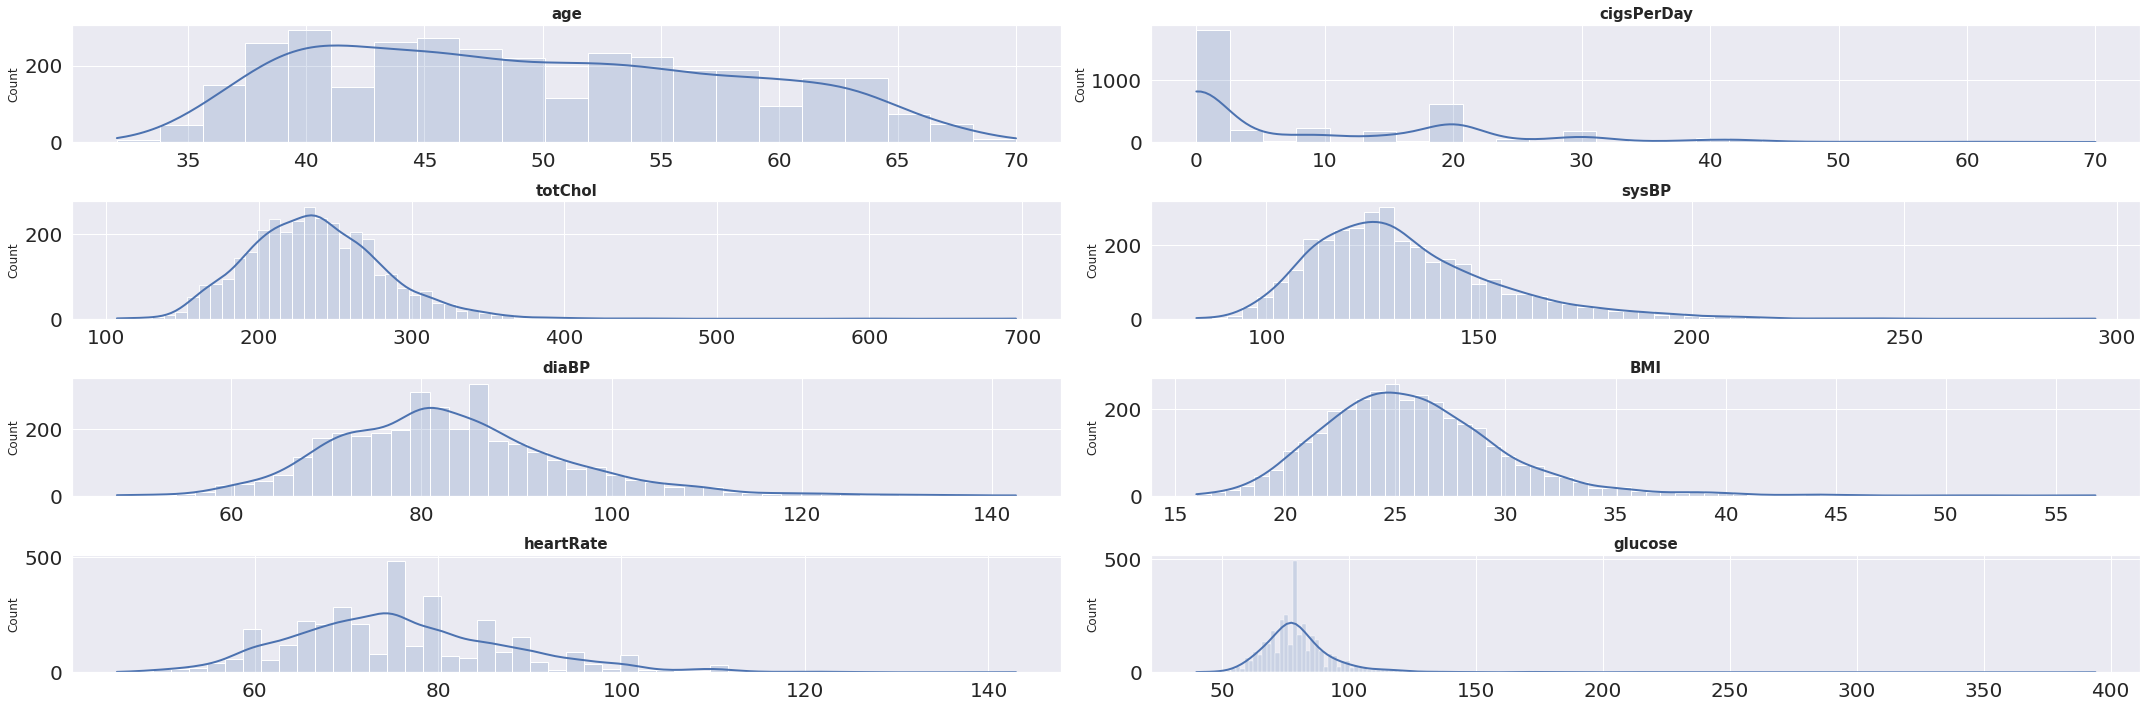

In [409]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (30, 10))


axes = axes.flat

columnas_numeric = df_concat2.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("id")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df_concat2,
        x = colum,
        kde = True, 
        palette = 'dark', 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout()

Numericas. relacion con variable respuesta

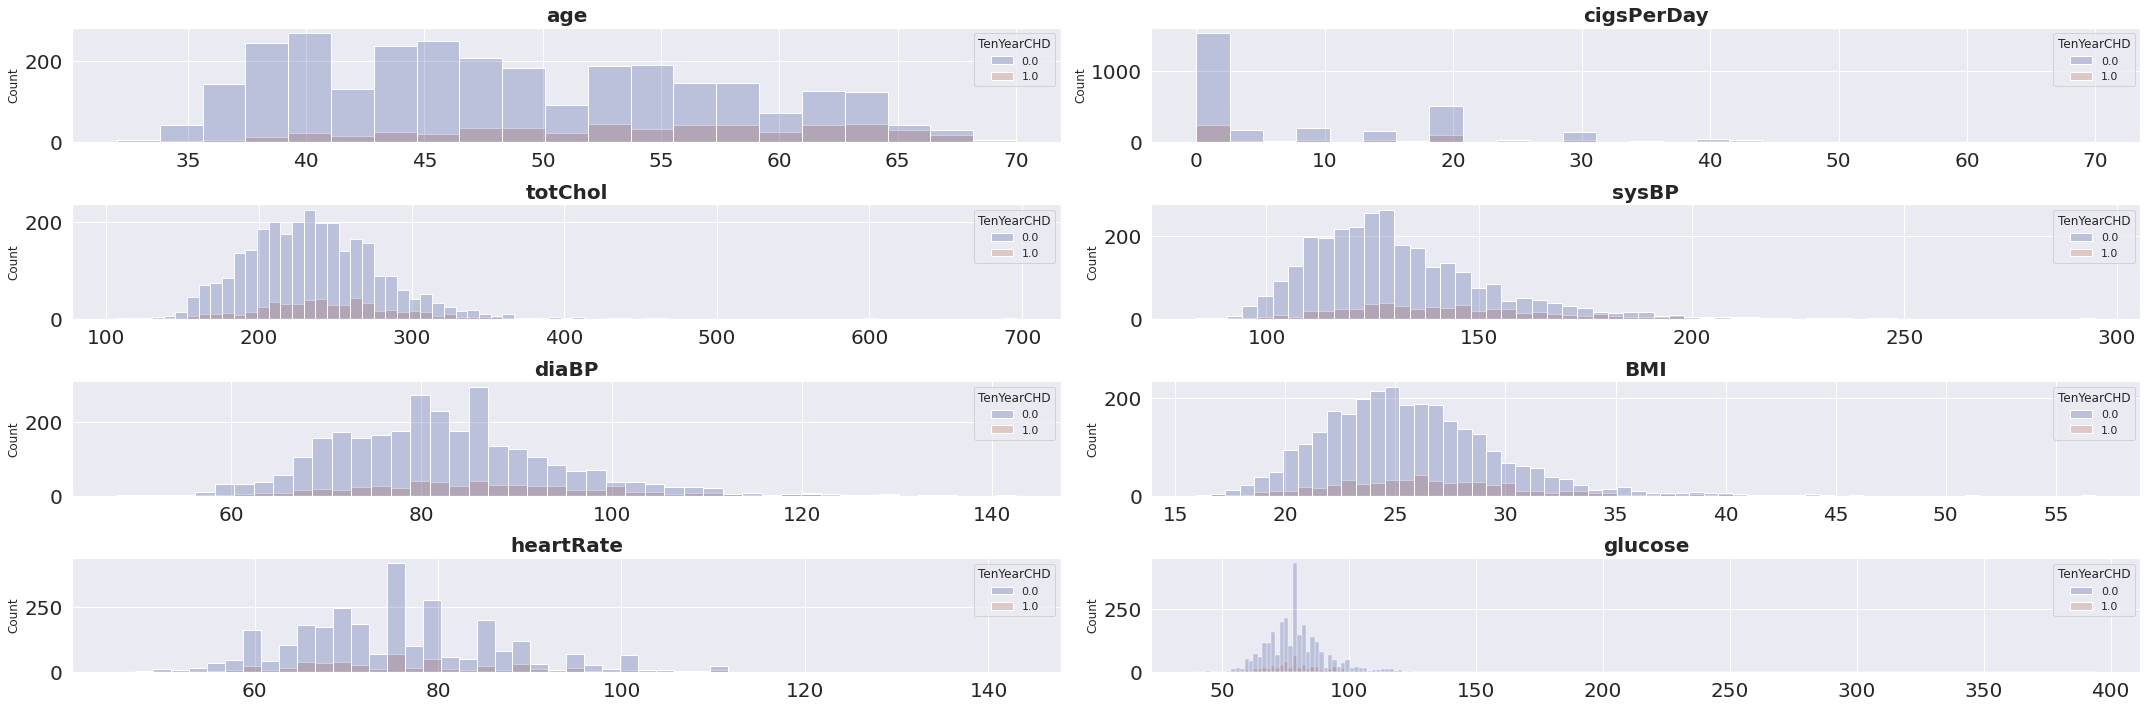

In [408]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (30, 10))


axes = axes.flat

columnas_numeric = df_concat2.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("id")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df_concat2,
        x = colum,
        hue = "TenYearCHD", 
        palette = 'dark',
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 20, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout()

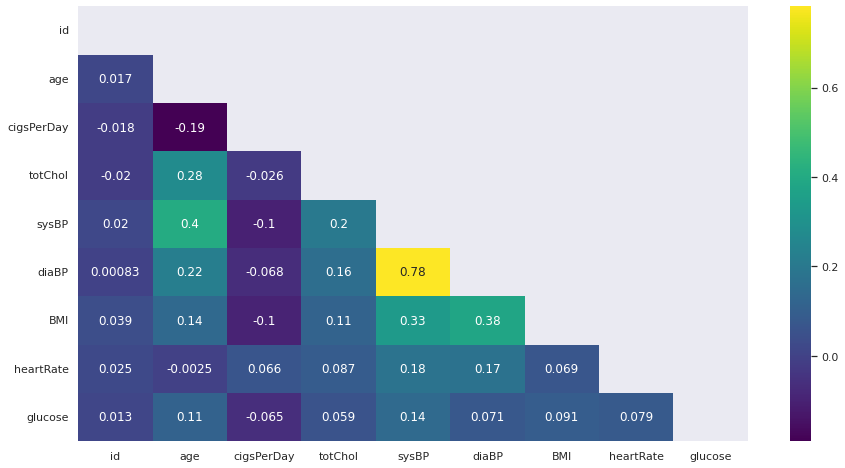

In [411]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(df_concat2.corr(), dtype=bool))
sns.heatmap(df_concat2.corr(), cmap="viridis", annot = True, mask = mask); #barra lateral

Al categorizar nuestra respuesta, no aparece en el heatmap, igual que las otras variables que hemos categorizado antes.

In [415]:
df_concat2.to_pickle("../data-log/01-dataframe.pickle" )

Lo guardamos en pickle, porque no nos guarda el cambio de dato category

# DE AQUI PARA ABAJO, CREO QUE ESTÁ HECHO, FALTA PREGUNTAR QUE NARICES HACEMOS, NO TENEMOS QUE HACER ENCODING, QUE YA ESTÁ HECHO.

#### Correlación entre variables numéricas

In [ ]:
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
           annot = True);

In [ ]:
# creamos un dataframe todo de unos de la misma forma que nuestra matriz de correlación

mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))

sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

#### Variables categóricas

In [ ]:
df.head(2)

In [ ]:
categoricas = df.select_dtypes(include = 'object').describe().T
categoricas.head()

In [ ]:
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='Set2');

In [ ]:
df.to_csv("../data-log/01-dataframe.csv" )

In [413]:
df_concat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sex              3390 non-null   category
 1   is_smoking       3390 non-null   category
 2   education        3390 non-null   category
 3   id               3390 non-null   float64 
 4   age              3390 non-null   float64 
 5   cigsPerDay       3390 non-null   float64 
 6   BPMeds           3390 non-null   category
 7   prevalentStroke  3390 non-null   category
 8   prevalentHyp     3390 non-null   category
 9   diabetes         3390 non-null   category
 10  totChol          3390 non-null   float64 
 11  sysBP            3390 non-null   float64 
 12  diaBP            3390 non-null   float64 
 13  BMI              3390 non-null   float64 
 14  heartRate        3390 non-null   float64 
 15  glucose          3390 non-null   float64 
 16  TenYearCHD       3390 non-null   category
